In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import os
import sys

from sys import path
lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)
# Append the absolute path to sys.path
sys.path.append(lib_path)
import Fokker_Planck as fp
from integrators import SGD

%load_ext autoreload
%autoreload 2

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [2]:
def simulate_sing(std_e, lr, b, dt, time, a, L, nw, w_left, w_right):
    """
    a: singularity coefficient
    """
    
    steps = int(time/dt)
    ve = std_e**2.
    v = 1
    
    w, w0 = sym.symbols('w w0')
    # potential
    q = (w + L/2) * (w-L/2)**a
    
    x, Ps = fp.run(q, nw, lr, v, ve, a, b, L, dt, steps, w_left, w_right)
    return q, x, Ps

In [12]:
std_e = 1.
lr = .01
b = 20
time = 500
a = 2
L = 4.
w_left, w_right = -L , L
dt = .01
nw = 1000

q, x, P = simulate_sing(std_e, lr, b, dt, time, a, L, nw, w_left, w_right)

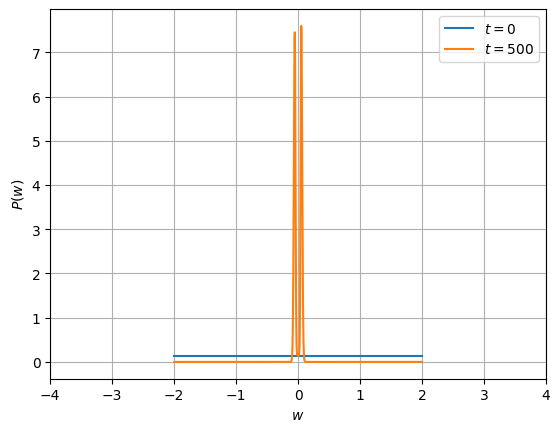

In [13]:
for it in [0, len(P)-1]:
    plt.plot(x-L/2, P[it], label=f'$t={it*dt:g}$')

plt.xlabel(r"$w$")
plt.ylabel(r"$P(w)$")
plt.grid()
plt.legend()
plt.xlim(w_left,w_right)
plt.show()

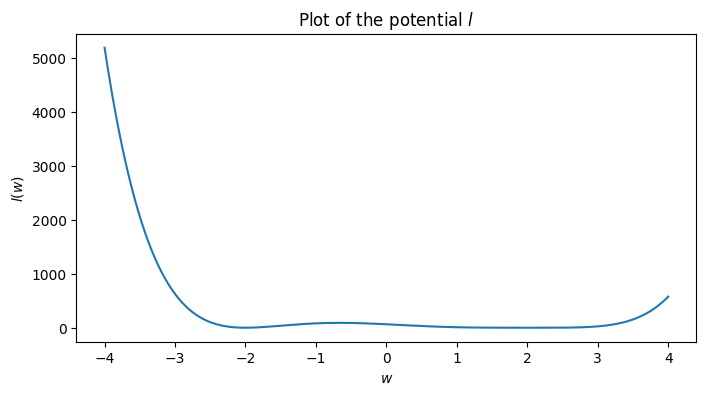

In [18]:
fp.plot_potential(q, wm=4, npts=500)